In [2]:
import os
import random
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.ndimage import gaussian_filter1d
from side_info_decoding.utils import set_seed, load_data_from_pids

seed = 666
set_seed(seed)

In [1]:
from one.api import ONE
from brainbox.io.one import SpikeSortingLoader
from ibllib.atlas import AllenAtlas

In [337]:
AUC_1_lst = [[0.96609621, 0.96753706, 0.96710132, 0.96834623, 0.96839956,
   0.96917396, 0.9690908 , 0.96820602, 0.97041527, 0.96986395,
   0.96989255, 0.97066275, 0.96968835, 0.97024603, 0.97173557,
   0.97160861, 0.97254872, 0.9698478 , 0.9709468 , 0.96030167],
  [0.92700122, 0.92795612, 0.92852499, 0.93004876, 0.92813897,
   0.92572125, 0.92232832, 0.92513206, 0.92525396, 0.92320195,
   0.92303941, 0.92114994, 0.92356766, 0.92417716, 0.92691995,
   0.92503048, 0.92440065, 0.90889882, 0.89705404, 0.87283625],
  [0.55359343, 0.56647496, 0.566666 , 0.56227193, 0.56889288,
   0.58816575, 0.59566904, 0.59438123, 0.60240866, 0.58765699,
   0.58963494, 0.59007695, 0.58877546, 0.56588163, 0.55249502,
   0.56749164, 0.57751697, 0.60029507, 0.5935768 , 0.56388288],
  [0.9186778 , 0.91688642, 0.91921732, 0.91232396, 0.91526445,
   0.91544271, 0.9174137 , 0.92341511, 0.92468261, 0.92566369,
   0.92895933, 0.92941993, 0.92261365, 0.92101618, 0.90866501,
   0.89325836, 0.88808766, 0.8816617 , 0.88011049, 0.85430121],
  [0.83081498, 0.8344206 , 0.83282264, 0.83183449, 0.82073907,
   0.8291091 , 0.8320842 , 0.83890018, 0.83305916, 0.83194429,
   0.84240919, 0.83705377, 0.8570224 , 0.85788883, 0.84673693,
   0.84485225, 0.8473637 , 0.81235962, 0.82058787, 0.82380701],
  [0.75971351, 0.75791168, 0.75606019, 0.7576609 , 0.76147339,
   0.76215415, 0.75823062, 0.75599849, 0.74403281, 0.74894802,
   0.74739835, 0.75673092, 0.75377516, 0.73810603, 0.73041012,
   0.74007273, 0.72195047, 0.72924833, 0.72235008, 0.68960651],
  [0.72178209, 0.7222823 , 0.71067466, 0.70721002, 0.71213113,
   0.70772616, 0.69983694, 0.70298528, 0.70847279, 0.69830569,
   0.70106906, 0.70504984, 0.69425993, 0.69204212, 0.6833033 ,
   0.66936629, 0.65435409, 0.65512646, 0.66812804, 0.64855885],
  [0.8288026 , 0.82946819, 0.82966876, 0.82836767, 0.82573355,
   0.83466512, 0.82408959, 0.82973634, 0.82044827, 0.80843897,
   0.80747299, 0.80772379, 0.81222847, 0.81347129, 0.80533581,
   0.80019251, 0.78603736, 0.79728497, 0.8101595 , 0.7742215 ],
  [0.95242488, 0.95520467, 0.95585746, 0.96010864, 0.95912664,
   0.96027123, 0.95749265, 0.95765364, 0.95781825, 0.95798285,
   0.96125363, 0.96305503, 0.96599741, 0.97090219, 0.97548016,
   0.97612934, 0.9805415 , 0.98005332, 0.98021431, 0.98021069],
  [0.92757083, 0.92669231, 0.92896209, 0.93087305, 0.93478119,
   0.93630699, 0.9356719 , 0.93723225, 0.93604995, 0.94143207,
   0.94008294, 0.93929081, 0.94067847, 0.94104315, 0.93863704,
   0.92771107, 0.93243347, 0.93359428, 0.92765048, 0.92256012],
  [0.80875436, 0.80655461, 0.8078623 , 0.80572278, 0.79777122,
   0.79408956, 0.79796587, 0.79318138, 0.78607939, 0.78760915,
   0.78835871, 0.79008904, 0.78248753, 0.78925399, 0.78460984,
   0.77354551, 0.77278143, 0.78413344, 0.77679701, 0.73818611],
  [0.92420653, 0.92478684, 0.92658854, 0.92804956, 0.92245898,
   0.92259835, 0.91848192, 0.92172158, 0.92199326, 0.92299166,
   0.92657903, 0.92421209, 0.92624136, 0.92094317, 0.92945645,
   0.91496343, 0.91630742, 0.92354858, 0.91753297, 0.88241492],
  [0.73229846, 0.73713695, 0.73884509, 0.7389014 , 0.74022266,
   0.74149063, 0.73747813, 0.73687449, 0.73819938, 0.74122529,
   0.74359973, 0.74007765, 0.74658145, 0.742453 , 0.75341007,
   0.76833409, 0.77657328, 0.76062029, 0.78214619, 0.76118291],
  [0.90820807, 0.90669558, 0.90517274, 0.90567933, 0.90690611,
   0.90183  , 0.90507787, 0.89954352, 0.90037407, 0.90293156,
   0.90682418, 0.91486052, 0.91652506, 0.91443408, 0.91150132,
   0.90062676, 0.89412195, 0.87988666, 0.87474268, 0.86194904],
  [0.9420281 , 0.94371314, 0.94341478, 0.94509932, 0.94470397,
   0.94420892, 0.94460452, 0.94529921, 0.945795 , 0.94302237,
   0.94956116, 0.95758877, 0.96175274, 0.9636325 , 0.9621449 ,
   0.96016666, 0.95104778, 0.95708538, 0.9582788 , 0.95778718],
  [0.96341176, 0.96344843, 0.96374052, 0.96382775, 0.96455105,
   0.96557364, 0.96535051, 0.96422188, 0.96127971, 0.96312911,
   0.96143287, 0.96275352, 0.9635041 , 0.96386536, 0.96390564,
   0.96274418, 0.96622517, 0.96941282, 0.94672847, 0.93451483]]

In [338]:
AUC_2_lst = [[0.96609621, 0.94845312, 0.93528887, 0.93284153, 0.91602809,
       0.90872845, 0.9007024 , 0.89086103, 0.8841319 , 0.87490118,
       0.85981881, 0.85129655, 0.82223768, 0.81824056, 0.77553905,
       0.76321435, 0.75988901, 0.74966063, 0.72921073, 0.68549322],
      [0.92700122, 0.89622105, 0.88439659, 0.86700528, 0.86111337,
       0.82960179, 0.83573751, 0.83516863, 0.82324258, 0.82092645,
       0.79802926, 0.78862251, 0.77586347, 0.74605851, 0.74067452,
       0.72927672, 0.71568468, 0.6893336 , 0.65589191, 0.65300691],
      [0.55359343, 0.53804067, 0.52769243, 0.49948382, 0.48781224,
       0.496855 , 0.50933977, 0.49976356, 0.49887511, 0.48269811,
       0.47726839, 0.47588123, 0.4599217 , 0.45419592, 0.42690587,
       0.439055 , 0.48591717, 0.49873315, 0.48530095, 0.48327086],
      [0.9186778 , 0.89681458, 0.89796914, 0.89396729, 0.88560912,
       0.87953287, 0.86299275, 0.83802643, 0.8325795 , 0.81906424,
       0.79376182, 0.79881074, 0.80220163, 0.80236492, 0.79731396,
       0.78462601, 0.78698072, 0.79307806, 0.7699902 , 0.74341756],
      [0.83081498, 0.7843403 , 0.78643767, 0.75595646, 0.73730221,
       0.73443252, 0.73035636, 0.69705565, 0.68302215, 0.68074095,
       0.68538867, 0.69518916, 0.71003639, 0.69069201, 0.67086768,
       0.66971516, 0.68456679, 0.65015936, 0.59492754, 0.5643977 ],
      [0.75971351, 0.74533942, 0.70894191, 0.68770042, 0.67383559,
       0.6529445 , 0.6472725 , 0.62812417, 0.58968963, 0.58644763,
       0.58774144, 0.59402248, 0.61094593, 0.60103594, 0.57233203,
       0.5708621 , 0.58362266, 0.59406674, 0.56834805, 0.55453134],
      [0.72178209, 0.69379406, 0.68623095, 0.67201442, 0.6565486 ,
       0.64449348, 0.624684 , 0.63223853, 0.62783724, 0.60524599,
       0.61632523, 0.62788505, 0.60686307, 0.61537386, 0.62938198,
       0.61688305, 0.59579364, 0.60965709, 0.60467959, 0.56259026],
      [0.8288026 , 0.80239572, 0.78963063, 0.79463598, 0.79442083,
       0.79254902, 0.77478757, 0.77165775, 0.77640766, 0.77245261,
       0.74933054, 0.73989832, 0.72671782, 0.68363357, 0.65155948,
       0.56166225, 0.59383027, 0.59631435, 0.59865799, 0.60960366],
      [0.95242488, 0.88294551, 0.86038646, 0.85155811, 0.84927173,
       0.83571084, 0.82997784, 0.83112243, 0.83047566, 0.81005886,
       0.78780692, 0.78715132, 0.7927117 , 0.7954959 , 0.79909107,
       0.76180445, 0.75296647, 0.70982801, 0.67534165, 0.66520852],
      [0.92757083, 0.88714048, 0.85521162, 0.83626884, 0.82340369,
       0.82904651, 0.79407731, 0.77473139, 0.7118055 , 0.68765869,
       0.65913704, 0.63192902, 0.62265486, 0.60816409, 0.60928557,
       0.57789931, 0.55201415, 0.54443175, 0.58682481, 0.59381778],
      [0.80875436, 0.75770476, 0.74546339, 0.73137448, 0.73811513,
       0.7390916 , 0.7288833 , 0.72741644, 0.72033112, 0.70958081,
       0.70430593, 0.67875102, 0.67635932, 0.64274745, 0.63071041,
       0.64333731, 0.64222319, 0.60380533, 0.57175442, 0.56629995],
      [0.92420653, 0.87072222, 0.85975698, 0.83077309, 0.80973723,
       0.81854589, 0.79599934, 0.80217248, 0.7806192 , 0.79874636,
       0.79409  , 0.78005481, 0.75883408, 0.74691947, 0.74194636,
       0.72892964, 0.66713121, 0.66999635, 0.65021102, 0.57930384],
      [0.73229846, 0.66273666, 0.6465035 , 0.64083689, 0.61717782,
       0.61464853, 0.6170696 , 0.61316108, 0.60429934, 0.61474631,
       0.60858687, 0.60348016, 0.5873643 , 0.57404323, 0.57466064,
       0.54436003, 0.52988088, 0.54000802, 0.53813792, 0.56955756],
      [0.90820807, 0.85440219, 0.8268947 , 0.81080436, 0.81509723,
       0.81645638, 0.79127947, 0.77923605, 0.76973983, 0.75652795,
       0.76138895, 0.78129489, 0.77523145, 0.70678828, 0.64317911,
       0.64901459, 0.62399046, 0.60989992, 0.58983799, 0.54693238],
      [0.9420281 , 0.87909907, 0.84203762, 0.82588589, 0.81873665,
       0.81129764, 0.78949164, 0.77769786, 0.77779363, 0.78730468,
       0.77292958, 0.76737451, 0.7459695 , 0.73407235, 0.70483519,
       0.69124834, 0.65734382, 0.55373523, 0.59645586, 0.5314386 ],
      [0.96341176, 0.93777724, 0.92992627, 0.89832777, 0.889095 ,
       0.88657109, 0.87996429, 0.85664749, 0.84922998, 0.84637304,
       0.83993045, 0.81752906, 0.82634654, 0.76823827, 0.70061248,
       0.70086665, 0.67887282, 0.64055258, 0.54822854, 0.51250092]]

In [339]:
AUC_3_lst = [[0.96609621, 0.9655918 , 0.96377477, 0.96367731, 0.96176055,
        0.95934702, 0.96122958, 0.95809608, 0.95551258, 0.95452895,
        0.94994264, 0.94669435, 0.94545889, 0.92979605, 0.92968849,
        0.92236375, 0.90349035, 0.90414462, 0.85460909, 0.81928343],
       [0.92700122, 0.92427672, 0.92480293, 0.91778545, 0.91872003,
        0.91331573, 0.91254978, 0.90258635, 0.9010382 , 0.89444535,
        0.89293174, 0.87234661, 0.87711906, 0.8580577 , 0.83783218,
        0.82795408, 0.7963592 , 0.81808818, 0.76900853, 0.73481004],
       [0.55359343, 0.55688784, 0.55020124, 0.54319112, 0.546215 ,
        0.54025321, 0.53859317, 0.54498033, 0.54629885, 0.52546361,
        0.54049108, 0.52776918, 0.53990851, 0.52481265, 0.52534255,
        0.52785084, 0.52197381, 0.50750254, 0.50781509, 0.49356657],
       [0.9186778 , 0.91899858, 0.91497177, 0.90650052, 0.90675586,
        0.91211618, 0.90257896, 0.89339531, 0.88872828, 0.8943836 ,
        0.87809364, 0.8683481 , 0.87030949, 0.86975915, 0.83971976,
        0.83040331, 0.83810882, 0.81302751, 0.73706971, 0.70328884],
       [0.83081498, 0.82554464, 0.82611795, 0.82791725, 0.814672 ,
        0.81017561, 0.8113829 , 0.8141869 , 0.80711475, 0.77402296,
        0.78815873, 0.77459602, 0.7702524 , 0.75167708, 0.76436326,
        0.71888331, 0.7047902 , 0.71162488, 0.68446716, 0.60393121],
       [0.75971351, 0.75769454, 0.75166935, 0.74133283, 0.74131043,
        0.73085491, 0.71906688, 0.72520023, 0.72139598, 0.71055293,
        0.7065974 , 0.68939795, 0.68515051, 0.67794841, 0.68248003,
        0.65855793, 0.63142513, 0.62828418, 0.59146023, 0.56738492],
       [0.72178209, 0.71824046, 0.71054777, 0.71429463, 0.70406476,
        0.69209362, 0.70926098, 0.68750328, 0.68230351, 0.67255348,
        0.64862579, 0.6410465 , 0.64142778, 0.63415413, 0.63541126,
        0.61411441, 0.62398826, 0.60017286, 0.5901709 , 0.5688857 ],
       [0.8288026 , 0.82837731, 0.82611514, 0.82581121, 0.82044253,
        0.81371414, 0.80101899, 0.80428083, 0.8084243 , 0.78903325,
        0.79100777, 0.76916057, 0.79126718, 0.75699419, 0.7587202 ,
        0.71873121, 0.70961665, 0.72398149, 0.67429472, 0.63186636],
       [0.95242488, 0.95353547, 0.94758451, 0.93668148, 0.93985226,
        0.93959339, 0.93326492, 0.93666265, 0.93290557, 0.92460154,
        0.90791058, 0.90543511, 0.90336055, 0.90534213, 0.87240104,
        0.8050098 , 0.81444561, 0.83070265, 0.7802398 , 0.7195586 ],
       [0.92757083, 0.92650402, 0.9223805 , 0.91989354, 0.92019484,
        0.91390061, 0.90471055, 0.90481711, 0.89881839, 0.89803172,
        0.88941214, 0.885419 , 0.87836608, 0.85635648, 0.85447594,
        0.84198265, 0.82955936, 0.79110195, 0.72903811, 0.68777849],
       [0.80875436, 0.80363482, 0.80257496, 0.79823165, 0.78896003,
        0.78032682, 0.78562809, 0.77138502, 0.75135517, 0.75831053,
        0.75293495, 0.73776557, 0.72783418, 0.7143639 , 0.72043049,
        0.69264523, 0.67475287, 0.65971668, 0.63451924, 0.57670113],
       [0.92420653, 0.91915907, 0.92012485, 0.91204426, 0.90850274,
        0.90738541, 0.90409845, 0.89053514, 0.89193963, 0.88628266,
        0.87005603, 0.88424287, 0.85680957, 0.85594806, 0.81956362,
        0.78876829, 0.78722531, 0.73368716, 0.70591788, 0.67754044],
       [0.73229846, 0.72793137, 0.72425067, 0.71870094, 0.71538474,
        0.71520663, 0.70153846, 0.70478409, 0.70359195, 0.7045513 ,
        0.6735938 , 0.68011702, 0.68323324, 0.67395503, 0.65442079,
        0.63280698, 0.62731578, 0.62639809, 0.61370691, 0.59676352],
       [0.90820807, 0.90229176, 0.90295697, 0.89344815, 0.89453396,
        0.88927518, 0.87739445, 0.87106231, 0.86726053, 0.8561673 ,
        0.84967643, 0.84183425, 0.83930504, 0.81185826, 0.7684825 ,
        0.78627939, 0.73160748, 0.71877914, 0.63917901, 0.63338773],
       [0.9420281 , 0.9415041 , 0.94080857, 0.93680476, 0.93854871,
        0.92882007, 0.92652624, 0.93227358, 0.92229649, 0.92180851,
        0.90282257, 0.91149929, 0.90824334, 0.88681213, 0.8656932 ,
        0.83540841, 0.80596535, 0.81095334, 0.79526447, 0.66334769],
       [0.96341176, 0.96142859, 0.96069746, 0.95846369, 0.95979735,
        0.95431535, 0.94952621, 0.94745431, 0.94162639, 0.94380103,
        0.94272108, 0.91651197, 0.90900508, 0.9048423 , 0.89100052,
        0.89249407, 0.88854045, 0.79669659, 0.78918433, 0.72520637]]

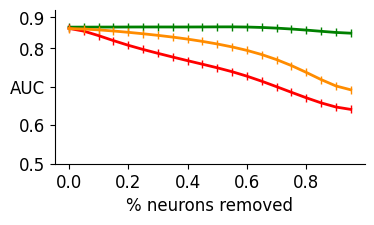

In [384]:
def plot_delete(x1, x2, x3):
    fig, ax = plt.subplots(1,1,figsize=(4., 2))
    min_len = min(len(x1), len(x2), len(x3))
    x = gaussian_filter1d(np.mean(x1, axis = 0), 2.)
    ax.plot(x, marker="|", label="remove least \nimportant first", c="green", linewidth=2)
    # ax.fill_between(np.arange(20), 
    #                 (x-.5*np.std(x1, axis = 0)), (x+.5*np.std(x1, axis = 0)), 
    #                 color='lightgreen', alpha=.1)
    x = gaussian_filter1d(np.mean(x2, axis = 0), 2.)
    ax.plot(x+0.03, marker="|", label="remove most \nimportant first", c="r", linewidth=2)
    # ax.fill_between(np.arange(20), 
    #                 (x+0.03-.5*np.std(x2, axis = 0)), (x+0.03+.5*np.std(x2, axis = 0)), 
    #                 color='coral', alpha=.1)
    x = gaussian_filter1d(np.mean(x3, axis = 0), 2.)
    ax.plot(x, marker="|", label="random", c="darkorange", linewidth=2)
    # ax.fill_between(np.arange(20), 
    #                 (x-.5*np.std(x3, axis = 0)), (x+.5*np.std(x3, axis = 0)), 
    #                 color='orange', alpha=.1)
    ax.set_xticks([0, 4, 8, 12, 16], np.array([0, 0.2, 0.4, 0.6, 0.8]), fontsize=12)
    ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.88], [0.5, 0.6, "AUC", 0.8, 0.9], fontsize=12)
    ax.set_ylim(0.5, .9)
    # ax.axhline(0.5, color="gray", linestyle="--")
    ax.set_xlabel("% neurons removed", fontsize=12)
    ax.spines[['right', 'top']].set_visible(False)
    # plt.ylabel("AUC")
    # plt.legend(frameon=False, fontsize=13)
    plt.savefig("./plots/neuron_removal.png", dpi=200)
# plot_delete(diff_mean(all_accs_IF), diff_mean(mean_accs_random), fraction=0.01)
plot_delete(AUC_1_lst, AUC_2_lst, AUC_3_lst)

In [3]:
pids = [
    # "dab512bd-a02d-4c1f-8dbc-9155a163efc0",
    # "febb430e-2d50-4f83-87a0-b5ffbb9a4943",
    # "523f8301-4f56-4faf-ab33-a9ff11331118",
    # "84bb830f-b9ff-4e6b-9296-f458fb41d160",
    # '0b8ea3ec-e75b-41a1-9442-64f5fbc11a5a',
    # '143dd7cf-6a47-47a1-906d-927ad7fe9117',
    # '16799c7a-e395-435d-a4c4-a678007e1550',
    # '1a60a6e1-da99-4d4e-a734-39b1d4544fad',
    # '1e176f17-d00f-49bb-87ff-26d237b525f1',
    '31f3e083-a324-4b88-b0a4-7788ec37b191'
]

In [4]:
import pickle
with open(f"./S0_b0.5_a1.5_Choice_PO_RRR_all_Metric_Matrix_20.pkl", "rb") as pickle_file:
    data = pickle.load(pickle_file)

In [79]:
U = data["svd_U"][-1]
V = data["svd_V"][-1]

In [6]:
X_dict, Y_dict = load_data_from_pids(
    pids,
    brain_region="po",
    behavior="choice",
    # behavior="reward",
    data_type="all_ks",
    n_t_bins = 40,
    align_time_type="stimOn_times",
    t_before=.5,
    t_after=1.5,
    normalize_input=False
)

pulling data from ibl database ..
eid: 61e11a11-ab65-48fb-ae08-3cb80662e5d6
pid: 31f3e083-a324-4b88-b0a4-7788ec37b191
number of trials found: 766 (active: 766)


/home/yizi/anaconda3/envs/clusterless/lib/python3.8/site-packages/brainbox/behavior/wheel.py:84: RuntimeWarning: divide by zero encountered in true_divide
  vel = dp / dt


prior for this session is not found.
found 766 trials from 106.48 to 4386.99 sec.
found 133 Kilosort units in region po


Compute spike count: 100%|███████████████████| 766/766 [00:03<00:00, 228.79it/s]


In [184]:
X = X_dict[pids[0]]

In [32]:
K,C,T = X.shape
neuron_firing = X.mean(0)*U.T[0].reshape(-1,1)
# neuron_firing = X.mean(0)
smooth_firing = np.array([gaussian_filter1d(neuron_firing[c,:], 1.5) for c in range(C)])
rank = np.argsort(np.abs(U.T[0]))
smooth_firing = smooth_firing[rank]

In [185]:
K,C,T = X.shape
# neuron_firing = X*U.T[0].reshape(1,C,1)*V[0].reshape(1,1,T)
neuron_firing = X*U.T[0].reshape(1,C,1)
smooth_firing = np.array([[gaussian_filter1d(neuron_firing[k,c,:], 1.5) for c in range(C)] for k in range(K)])
rank = np.argsort(np.abs(U.T[0]))
smooth_firing = smooth_firing[:,rank]

In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

def LDA_classification(X, y, nfolds=0, verbal=True, l1=False, balanced_acc=False):
    assert np.all(np.isin(np.unique(y), [0, 1]))
    ## y label should be 1/ -1
    if nfolds > 0:
        kf = KFold(n_splits=nfolds, shuffle=True, random_state=42)
        bestaccuracy_scores = []
        # Perform n-fold cross-validation
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            if len(np.unique(y_test)) < 2:
                continue
            try:
                if l1:
                    best = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
                    # best = LogisticRegression(C=0.001)
                else:
                    best = LinearDiscriminantAnalysis(solver='eigen')
                # Fit the model on the entire training set
                best.fit(X_train, y_train)
                y_pred = best.predict(X_test)
                y_prob = best.predict_proba(X_test)[:,1]
                # Calculate accuracy on the test set
                if balanced_acc:
                    # accuracy = balanced_accuracy_score(y_test, y_pred)
                    accuracy = roc_auc_score(y_test, y_prob)
                    bestaccuracy_scores.append(accuracy)
                else:
                    accuracy = accuracy_score(y_test, y_pred)
                    bestaccuracy_scores.append(accuracy)
            except:
                bestaccuracy_scores.append(0.5)
                
        return np.mean(bestaccuracy_scores), bestaccuracy_scores

In [10]:
X = X_dict[pids[0]]
X = X[:,rank]
K,C,T = X.shape
Y = Y_dict[pids[0]]
# X = X.sum(-1).reshape(-1,C,1)

acc_per_neuron = []
for i in range(C):
    X_single = X[:,i]
    mean_acc, accs = LDA_classification(X_single, Y, nfolds=5, balanced_acc=True)
    acc_per_neuron.append(mean_acc)
acc_per_neuron = np.array(acc_per_neuron)

In [11]:
acc_per_neuron[10:15]

array([0.54901652, 0.53357992, 0.47953646, 0.49710653, 0.5       ])

In [13]:
%matplotlib inline
plt.rc("figure", dpi=200)
SMALL_SIZE = 8
BIGGER_SIZE = 10
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=.5)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=1)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10

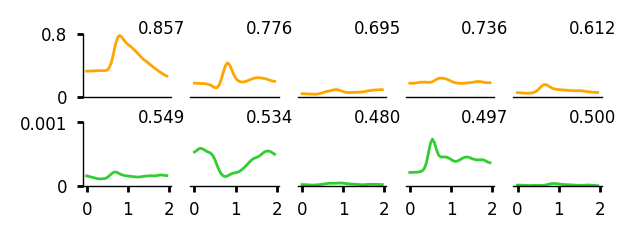

In [50]:

fig, axes = plt.subplots(2,5,figsize=(3., 1.))
for i in range(5):
    axes[0,i].plot(np.abs(smooth_firing[-(i+1)].T), c="orange", linewidth=1.)
    axes[0,i].set_xticks([],[])
    axes[0,i].set_yticks([],[])
    axes[0,i].set_ylim(0, 0.8)
    axes[0,i].text(25, 0.8, f"{acc_per_neuron[-(i+1)]:.3f}", c="k", fontsize=6)
    if i == 0:
        axes[0,i].spines[['right', 'top']].set_visible(False)
        axes[0,i].set_yticks([0, 0.8],[0, 0.8], fontsize=6)
    else:
        axes[0,i].spines[['right', 'top', "left"]].set_visible(False)
    axes[0,i].tick_params('both', length=2, width=1, which='major')
    axes[0,i].tick_params('both', length=2, width=1, which='minor')
    
for i in range(5):
    axes[1,i].plot(np.abs(smooth_firing[i+10].T), linewidth=1., c="limegreen")
    # axes[i].set_ylim(0, 0.8)
    axes[1,i].set_yticks([],[])
    axes[1,i].set_ylim(0, 0.001)
    axes[1,i].text(25, 0.001, f"{acc_per_neuron[i+10]:.3f}", c="k", fontsize=6)
    axes[1,i].set_xticks([0,20,40],[0,1,2], fontsize=6)
    if i == 0:
        axes[1,i].set_yticks([0, 0.001],[0, 0.001], fontsize=6)
        axes[1,i].spines[['right', 'top']].set_visible(False)
    else:
        axes[1,i].spines[['right', 'top', "left"]].set_visible(False)
    axes[1,i].tick_params('both', length=2, width=1, which='major')
    axes[1,i].tick_params('both', length=2, width=1, which='minor')
plt.tight_layout(pad=0.01)
# plt.savefig("./plots/single_neuron_analysis.png", dpi=200)

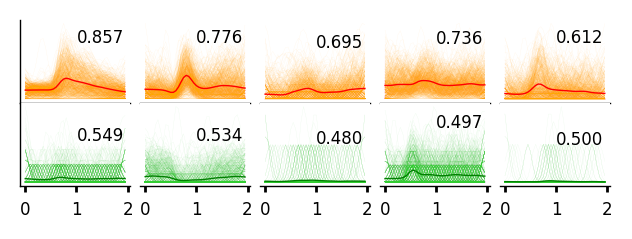

In [187]:
fig, axes = plt.subplots(2,5,figsize=(3., 1.))
for i in range(5):
    axes[0,i].plot(np.abs(smooth_firing[:,-(i+1)]).T, c="orange", linewidth=.1, alpha=.1)
    axes[0,i].plot(np.abs(smooth_firing.mean(0)[-(i+1)]).T, c="r", linewidth=.5, alpha=1.)
    axes[0,i].set_xticks([],[])
    # axes[0,i].set_yticks([],[])
    # axes[0,i].set_ylim(0, 0.8)
    axes[0,i].text(20, np.quantile(np.abs(smooth_firing[:,-(i+1)]),.998), f"{acc_per_neuron[-(i+1)]:.3f}", c="k", fontsize=6)
    if i == 0:
        axes[0,i].spines[['right', 'top']].set_visible(False)
        axes[0,i].set_yticks([],[])
        # axes[0,i].set_yticks([0, 0.8],[0, 0.8], fontsize=6)
    else:
        axes[0,i].spines[['right', 'top', "left"]].set_visible(False)
        axes[0,i].set_yticks([],[])
    axes[0,i].tick_params('both', length=2, width=1, which='major')
    axes[0,i].tick_params('both', length=2, width=1, which='minor')
    
for i in range(5):
    axes[1,i].plot(np.abs(smooth_firing[:,i+10]).T, linewidth=.1, c="limegreen", alpha=.1)
    axes[1,i].plot(np.abs(smooth_firing.mean(0)[i+10]).T, c="g", linewidth=.5, alpha=1.)
    # axes[1,i].set_ylim(0, 0.001)
    axes[1,i].text(20, np.quantile(np.abs(smooth_firing[:,i+10]),.998), f"{acc_per_neuron[i+10]:.3f}", c="k", fontsize=6)
    axes[1,i].set_xticks([0,20,40],[0,1,2], fontsize=6)
    if i == 0:
        # axes[1,i].set_yticks([0, 0.001],[0, 0.001], fontsize=6)
        axes[1,i].set_yticks([],[])
        axes[1,i].spines[['right', 'top']].set_visible(False)
    else:
        axes[1,i].set_yticks([],[])
        axes[1,i].spines[['right', 'top', "left"]].set_visible(False)
    axes[1,i].tick_params('both', length=2, width=1, which='major')
    axes[1,i].tick_params('both', length=2, width=1, which='minor')
plt.tight_layout(pad=0.01)
# plt.savefig("./plots/single_neuron_analysis_before_warp.png", dpi=400)

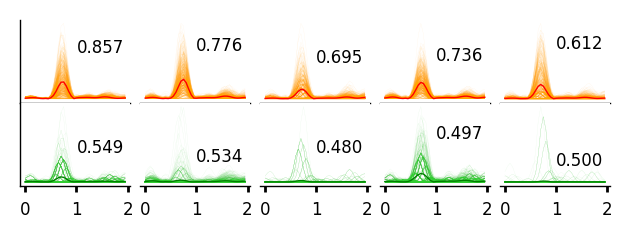

In [183]:

fig, axes = plt.subplots(2,5,figsize=(3., 1.))
for i in range(5):
    axes[0,i].plot(np.abs(smooth_firing[:,-(i+1)]).T, c="orange", linewidth=.1, alpha=.1)
    axes[0,i].plot(np.abs(smooth_firing.mean(0)[-(i+1)]).T, c="r", linewidth=.5, alpha=1.)
    axes[0,i].set_xticks([],[])
    axes[0,i].set_yticks([],[])
    # axes[0,i].set_ylim(0, 0.8)
    axes[0,i].text(20, np.quantile(np.abs(smooth_firing[:,-(i+1)]),.998), f"{acc_per_neuron[-(i+1)]:.3f}", c="k", fontsize=6)
    if i == 0:
        axes[0,i].spines[['right', 'top']].set_visible(False)
        # axes[0,i].set_yticks([0, 0.8],[0, 0.8], fontsize=6)
    else:
        axes[0,i].spines[['right', 'top', "left"]].set_visible(False)
    axes[0,i].tick_params('both', length=2, width=1, which='major')
    axes[0,i].tick_params('both', length=2, width=1, which='minor')
    
for i in range(5):
    axes[1,i].plot(np.abs(smooth_firing[:,i+10]).T, linewidth=.1, c="limegreen", alpha=.1)
    axes[1,i].plot(np.abs(smooth_firing.mean(0)[i+10]).T, c="g", linewidth=.5, alpha=1.)
    axes[1,i].set_yticks([],[])
    # axes[1,i].set_ylim(0, 0.001)
    axes[1,i].text(20, np.quantile(np.abs(smooth_firing[:,i+10]),.998), f"{acc_per_neuron[i+10]:.3f}", c="k", fontsize=6)
    axes[1,i].set_xticks([0,20,40],[0,1,2], fontsize=6)
    if i == 0:
        # axes[1,i].set_yticks([0, 0.001],[0, 0.001], fontsize=6)
        axes[1,i].spines[['right', 'top']].set_visible(False)
    else:
        axes[1,i].spines[['right', 'top', "left"]].set_visible(False)
    axes[1,i].tick_params('both', length=2, width=1, which='major')
    axes[1,i].tick_params('both', length=2, width=1, which='minor')
plt.tight_layout(pad=0.01)
# plt.savefig("./plots/single_neuron_analysis_after_warp.png", dpi=400)

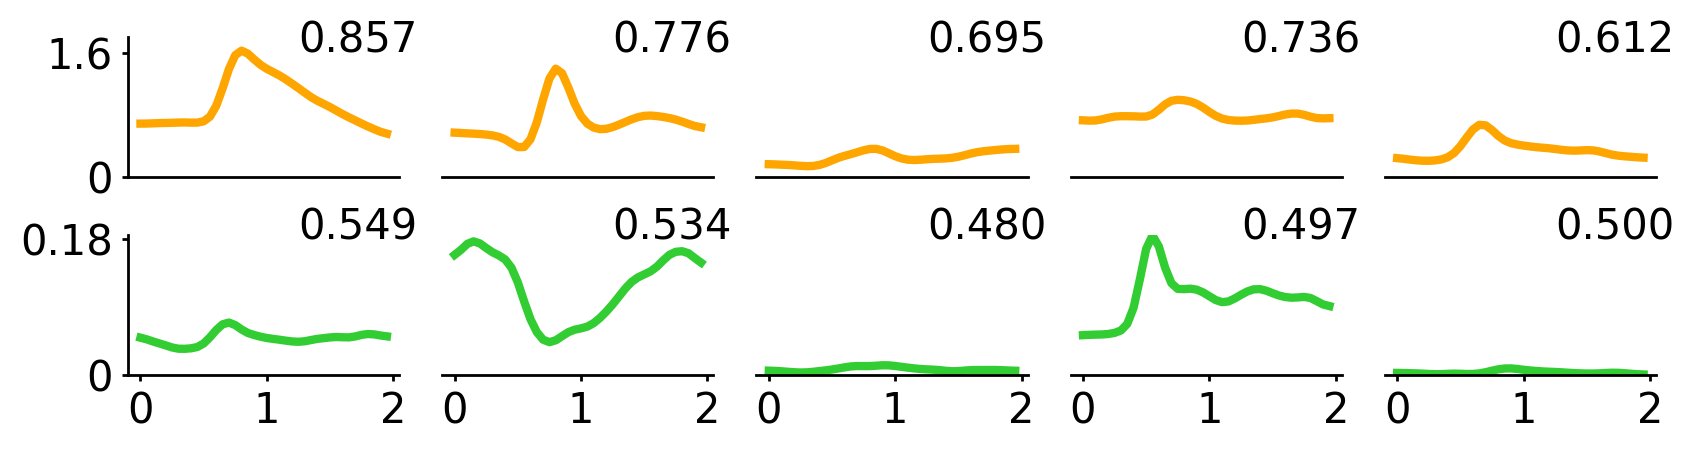

In [526]:

fig, axes = plt.subplots(2,5,figsize=(8.4,2.1))
for i in range(5):
    axes[0,i].plot(smooth_firing[-(i+1)].T, c="orange", linewidth=3.)
    axes[0,i].set_xticks([],[])
    axes[0,i].set_yticks([],[])
    axes[0,i].set_ylim(0, 1.8)
    axes[0,i].text(25, 1.6, f"{acc_per_neuron[-(i+1)]:.3f}", c="k")
    if i == 0:
        axes[0,i].spines[['right', 'top']].set_visible(False)
        axes[0,i].set_yticks([0, 1.6],[0, 1.6])
    else:
        axes[0,i].spines[['right', 'top', "left"]].set_visible(False)
    axes[0,i].tick_params('both', length=2, width=1, which='major')
    axes[0,i].tick_params('both', length=2, width=1, which='minor')
    
for i in range(5):
    axes[1,i].plot(smooth_firing[i+10].T, linewidth=3., c="limegreen")
    # axes[i].set_ylim(0, 0.8)
    axes[1,i].set_yticks([],[])
    axes[1,i].set_ylim(0, 0.185)
    axes[1,i].text(25, 0.18, f"{acc_per_neuron[i+10]:.3f}", c="k")
    axes[1,i].set_xticks([0,20,40],[0,1,2])
    if i == 0:
        axes[1,i].set_yticks([0, 0.18],[0, 0.18])
        axes[1,i].spines[['right', 'top']].set_visible(False)
    else:
        axes[1,i].spines[['right', 'top', "left"]].set_visible(False)
    axes[1,i].tick_params('both', length=2, width=1, which='major')
    axes[1,i].tick_params('both', length=2, width=1, which='minor')
plt.tight_layout(pad=0.1)
# plt.savefig("./plots/single_neuron_analysis.png", dpi=200)

/tmp/ipykernel_64374/4147278988.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loaded_arrays[region] = np.mean(np.abs(array_i["svd_V"]), axis=0, dtype=object)
/tmp/ipykernel_64374/4147278988.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arrays_1.append(gaussian_filter1d(loaded_arrays[region][rank].astype(np.float), 3.))


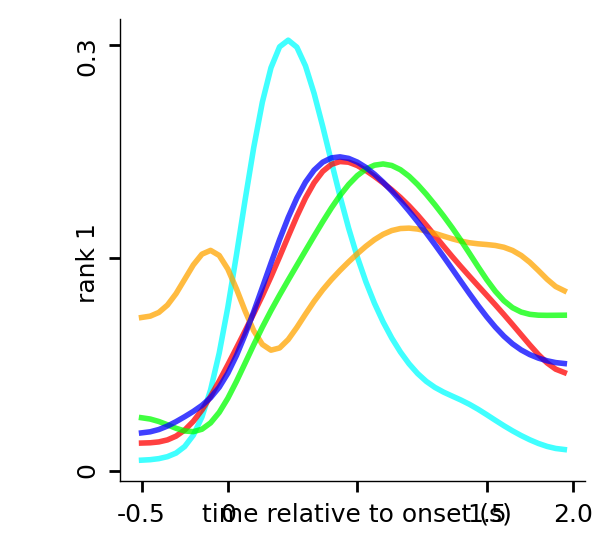

In [103]:
import pickle
from scipy.ndimage import gaussian_filter1d


Regions = ['PO', 'LP', 'DG', 'CA1', 'VIS']
loaded_arrays = {}
for idx, region in enumerate(Regions):
    with open(f"../saved_results/Feedback0_b0.5_a2.0_Reward_{region}_Multi_all_Metric_Matrix.pkl", "rb") as pickle_file:
        array_i = pickle.load(pickle_file)
        loaded_arrays[region] = np.mean(np.abs(array_i["svd_V"]), axis=0, dtype=object)
from sklearn.preprocessing import normalize

roi_full_names = ["All", "PO", "LP", "DG", "CA1", "VISa"]

# colors = ["red", "blue", "darkorange", "lime", "purple"]
colors = ["cyan", "red", "orange", "lime", "b"]

fig, ax = plt.subplots(1, 1, figsize=(3,3))
rank = 0 # Take the 1st rank
arrays_1 = []
for region in Regions:
    arrays_1.append(gaussian_filter1d(loaded_arrays[region][rank].astype(np.float), 3.))
arrays_1 = np.array(arrays_1)
l2_norm = np.array([np.linalg.norm(arrays_1[i]) for i in range(len(Regions))])
norm_svd_V = arrays_1 / l2_norm.reshape(-1,1)
for i in range(len(norm_svd_V)):
    ax.plot(norm_svd_V[i], label=roi_full_names[i], linewidth=2, alpha=.75, c=colors[i])
# ax.axvline(x=10, c="darkgray", linestyle="--", linewidth=2)
# plt.xticks([0, 6.25, 12.5, 18.75, 25, 31.25, 37.5, 43.75, 50], [-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25, 1.5])
ax.set_xticks([0,10, 25, 40,50], [-0.5, 0, "time relative to onset (s)", 1.5, 2.0], fontsize=9)
ax.set_yticks([0, 0.15, 0.3], [0, "\n\nrank 1", 0.3], fontsize=9, rotation=90)
# plt.ylim([-0.55, 0.55])
# ax.set_xlabel("time relative to feedback onset (s)", fontsize=12)
# ax.set_ylabel("1st rank", fontsize=10)
# plt.legend(frameon=False)
# ax.spines['bottom'].set_color('dimgrey')
# ax.spines['left'].set_color('dimgrey')
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params('both', length=4, width=1, which='major')
ax.tick_params('both', length=4, width=1, which='minor')
# plt.savefig("../saved_results/std_V_feedback_rank1.png", dpi=200)
plt.show()

In [178]:
loaded_arrays = {}
for idx, region in enumerate(Regions):
    with open(f"../saved_results/S0_b0.5_a1.5_Choice_{region}_Multi_all_Metric_Matrix_10.pkl", "rb") as pickle_file:
        array_i = pickle.load(pickle_file)
        loaded_arrays[region] = np.abs(array_i["svd_V"])

/tmp/ipykernel_64374/3932543989.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loaded_arrays[region] = np.abs(array_i["svd_V"])


/tmp/ipykernel_64374/2139205503.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))


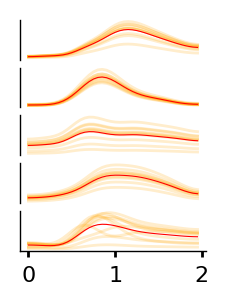

In [179]:
rank = 0 # Take the 1st rank
arrays_1 = []
for region in Regions:
    arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))
arrays_1 = np.array(arrays_1)
l2_norm = np.array([np.linalg.norm(arrays_1[i]) for i in range(len(Regions))])
norm_svd_V = arrays_1 / l2_norm.reshape(-1,1)

fig, axes = plt.subplots(5,1, figsize=(1.2,1.5))
for j, region in enumerate(Regions):
    axes[j].set_yticks([],[])
    axes[j].set_xticks([0,20,40],[0,1,2], fontsize=8)
    for i in range(len(loaded_arrays[region])):
        smooth = gaussian_filter1d(loaded_arrays[region][i][0], 3.)
        axes[j].plot(smooth.T/l2_norm[j], alpha=.2, linewidth=1., c="orange")
    if j != 4:
        axes[j].spines[['right', 'top', 'bottom']].set_visible(False)
        axes[j].set_xticks([],[])
    else:
        axes[j].spines[['right', 'top']].set_visible(False)
    axes[j].plot(norm_svd_V[j].T, alpha=1., linewidth=.4, c="r")
    axes[j].tick_params('both', length=2, width=1, which='major')
    axes[j].tick_params('both', length=2, width=1, which='minor')
plt.savefig("./plots/choice_timescale.png", dpi=300)

/tmp/ipykernel_89221/1908604191.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))


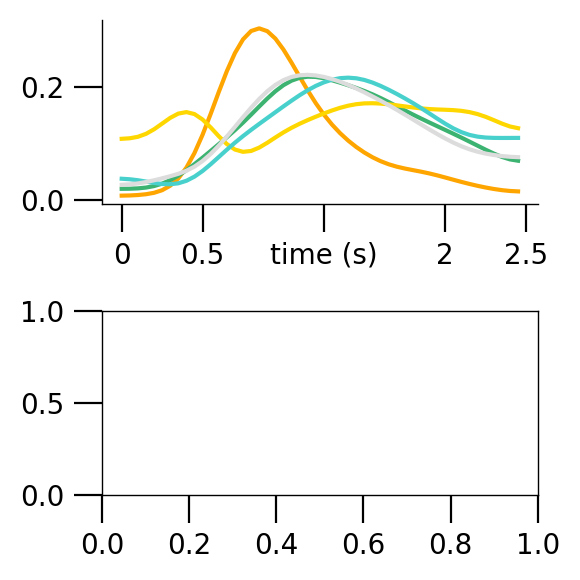

In [587]:
colors = ["orange", "mediumseagreen", "gold", "mediumturquoise", "gainsboro"]

rank = 0 # Take the 1st rank
arrays_1 = []
for region in Regions:
    arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))
arrays_1 = np.array(arrays_1)
l2_norm = np.array([np.linalg.norm(arrays_1[i]) for i in range(len(Regions))])
norm_svd_V = arrays_1 / l2_norm.reshape(-1,1)

fig, axes = plt.subplots(2,1, figsize=(3,3))
for j, region in enumerate(Regions):
    l2_norm = np.array([np.linalg.norm(loaded_arrays[region][i][0]) for i in range(len(loaded_arrays[region]))])
    timescale_per_region = []
    for i in range(len(loaded_arrays[region])):
        smooth = gaussian_filter1d(loaded_arrays[region][i][0], 3.)
        timescale_per_region.append(smooth)
        smooth = smooth / l2_norm[i]
        # axes[0].plot(smooth, c=colors[j], alpha=.1)
        # axes[1].set_yticks([], [])
    axes[0].set_xticks([0,10,25,40,50], [0,0.5,"time (s)",2,2.5])
    axes[0].spines[['right', 'top']].set_visible(False)
        # axes[1].spines[['right', 'top']].set_visible(False)
    axes[0].plot(norm_svd_V[j].T, c=colors[j], alpha=1.)
plt.tight_layout()
plt.savefig("./plots/reward_timescale.png", dpi=200)

In [180]:
loaded_arrays = {}
for idx, region in enumerate(Regions):
    with open(f"../saved_results/Feedback0_b0.5_a2.0_Reward_{region}_Multi_all_Metric_Matrix.pkl", "rb") as pickle_file:
        array_i = pickle.load(pickle_file)
        loaded_arrays[region] = np.abs(array_i["svd_V"])

/tmp/ipykernel_64374/390861327.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  loaded_arrays[region] = np.abs(array_i["svd_V"])


/tmp/ipykernel_64374/734119856.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))


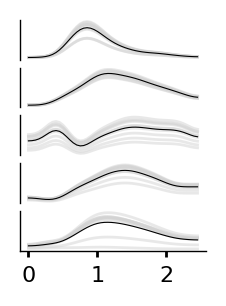

In [181]:
rank = 0 # Take the 1st rank
arrays_1 = []
for region in Regions:
    arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))
arrays_1 = np.array(arrays_1)
l2_norm = np.array([np.linalg.norm(arrays_1[i]) for i in range(len(Regions))])
norm_svd_V = arrays_1 / l2_norm.reshape(-1,1)

fig, axes = plt.subplots(5,1, figsize=(1.2,1.5))
for j, region in enumerate(Regions):
    axes[j].set_yticks([],[])
    axes[j].set_xticks([0,20,40],[0,1,2], fontsize=8)
    for i in range(len(loaded_arrays[region])):
        smooth = gaussian_filter1d(loaded_arrays[region][i][0], 3.)
        axes[j].plot(smooth.T/l2_norm[j], alpha=.5, linewidth=1., c="lightgray")
    if j != 4:
        axes[j].spines[['right', 'top', 'bottom']].set_visible(False)
        axes[j].set_xticks([],[])
    else:
        axes[j].spines[['right', 'top']].set_visible(False)
    axes[j].plot(norm_svd_V[j].T, alpha=1., linewidth=.4, c="k")
    axes[j].tick_params('both', length=2, width=1, which='major')
    axes[j].tick_params('both', length=2, width=1, which='minor')
plt.savefig("./plots/reward_timescale.png", dpi=300)

/tmp/ipykernel_89221/2848442974.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))


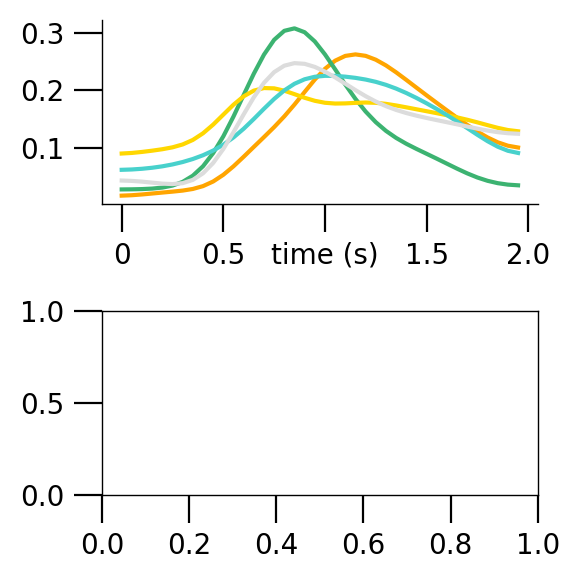

In [589]:
colors = ["orange", "mediumseagreen", "gold", "mediumturquoise", "gainsboro"]

rank = 0 # Take the 1st rank
arrays_1 = []
for region in Regions:
    arrays_1.append(gaussian_filter1d(np.mean(loaded_arrays[region],0)[rank].astype(np.float), 3.))
arrays_1 = np.array(arrays_1)
l2_norm = np.array([np.linalg.norm(arrays_1[i]) for i in range(len(Regions))])
norm_svd_V = arrays_1 / l2_norm.reshape(-1,1)

fig, axes = plt.subplots(2,1, figsize=(3,3))
for j, region in enumerate(Regions):
    # l2_norm = np.array([np.linalg.norm(loaded_arrays[region][i][0]) for i in range(len(loaded_arrays[region]))])
    # timescale_per_region = []
    # for i in range(len(loaded_arrays[region])):
    #     smooth = gaussian_filter1d(loaded_arrays[region][i][0], 3.)
    #     timescale_per_region.append(smooth)
    #     # smooth = smooth / l2_norm[i]
    #     axes[0].plot(smooth, c=colors[j], alpha=.1)
    #     axes[1].set_yticks([], [])
    axes[0].set_xticks([0,10,20,30,40], [0,0.5,"time (s)",1.5,2.])
    axes[0].spines[['right', 'top']].set_visible(False)
    #     axes[1].spines[['right', 'top']].set_visible(False)
    axes[0].plot(norm_svd_V[j].T, c=colors[j], alpha=1.)
plt.tight_layout()
plt.savefig("./plots/choice_timescale.png", dpi=200)